C:\Users\hui\anaconda3\envs\py38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'XLE'}, xlabel='Date'>

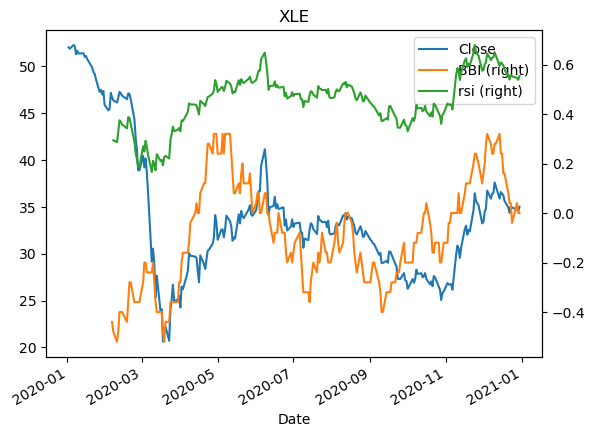

In [1]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_ta as ta
from scipy.stats import entropy
import numpy as np
import math

def get_indicator(q, ind_name, params):
    ts = None
    if ind_name == 'rsi':
        ts = q.ta.rsi(params['length']) / 100
        
    return ts

window=25
ticker='XLE'
df=yf.download(tickers= ticker,start= '2020-01-01',end='2020-12-31', interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['rsi'] = get_indicator(df, 'rsi', {'length': 25})
#df['rsi_ma'] =df['rsi'].rolling(window).mean()
df['NHP']=(df['High'].diff()>0).astype(int)
df['NHPpct']=df['NHP'].rolling(window).sum()/window
df['NLP']=(df['Low'].diff()<0).astype(int)
df['NLPpct']=df['NLP'].rolling(window).sum()/window
df['BBI'] = df['NHPpct']-df['NLPpct']
df['GPI']=df['Close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
#df['q']=df['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
#df['GPI']=df['p']/df['q']
df[['Close','BBI','rsi']].plot(secondary_y=['BBI','rsi'],title=ticker)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'XLY'}, xlabel='Date'>

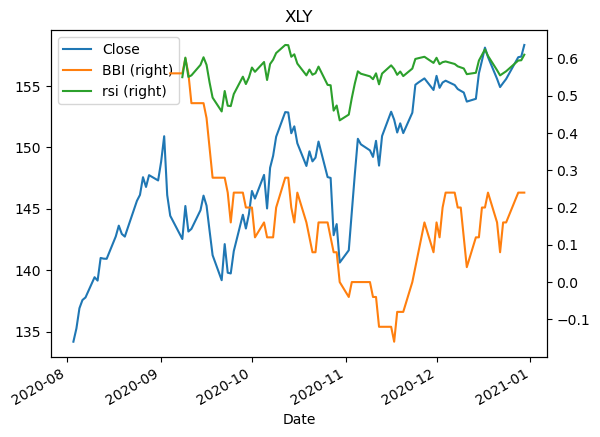

In [2]:
window=25
ticker='XLY'
df=yf.download(tickers= ticker,start= '2020-08-01',end='2020-12-31', interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
df['rsi'] = get_indicator(df, 'rsi', {'length': 25})
#df['rsi_ma'] =df['rsi'].rolling(window).mean()
df['NHP']=(df['High'].diff()>0).astype(int)
df['NHPpct']=df['NHP'].rolling(window).sum()/window
df['NLP']=(df['Low'].diff()<0).astype(int)
df['NLPpct']=df['NLP'].rolling(window).sum()/window
df['BBI'] = df['NHPpct']-df['NLPpct']
df['GPI']=df['Close'].diff().rolling(window).apply(lambda x: x.gt(0).sum())/window
#df['q']=df['close'].diff().rolling(window).apply(lambda x: x.lt(0).sum())/window
#df['GPI']=df['p']/df['q']
df[['Close','BBI','rsi']].plot(secondary_y=['BBI','rsi'],title=ticker)